In [ ]:
## C:\Users\52054867\machine learning\mobiledata.csv


## Feature Selection

Top reasons to use feature selection are:

- It enables the machine learning algorithm to train faster.
- It reduces the complexity of a model and makes it easier to interpret.
- It improves the accuracy of a model if the right subset is chosen.
- It reduces overfitting.

#### Three techniques we are going to use
- SelectKBest
- Feature Importance
- Correlation

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv(r'C:\Users\52054867\machine learning\mobiledata.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


##### univariate selection

like we separate target varaible from dataset, also known as univariate selection

In [5]:
x = df.iloc[:,:-1]
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [7]:
y = df.iloc[:,-1:]
y

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


## Selectkbest : 
The SelectKBest class just scores the features using a function (in this case f_classif but could be others) and then "removes all but the k highest scoring features"

chi2
https://www.mathsisfun.com/data/chi-square-test.html

Example: "Which holiday do you prefer?"
 	      Beach	Cruise
Men	      209	280
Women	  225	248
Does Gender affect Preferred Holiday?
If Gender (Man or Woman) does affect Preferred Holiday we say they are dependent.

By doing some special calculations (explained later), we come up with a "p" value:

p value is 0.132

Now, p < 0.05 is the usual test for dependence.

In this case p is greater than 0.05, so we believe the variables are independent (ie not linked together).

In other words Men and Women probably do not have a different preference for Beach Holidays or Cruises.

It was just random differences which we expect when collecting data

## "p" is the probability the variables are independent.

In [8]:
%config Completer.use_jedi = False

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [11]:
df.shape

(2000, 21)

In [14]:
ordered_best_features = SelectKBest(score_func=chi2,k=20)
ordered_feature = ordered_best_features.fit(x,y)


In [16]:
ordered_feature.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [23]:
## we understand that higher the value of p, the more features (x) is independent of target feature (y), 
# we should select dependent features ie with less p value.
ordered_series = pd.Series(np.round(ordered_feature.pvalues_,2),index=x.columns)
ordered_series.sort_values(ascending=False)

three_g          0.95
wifi             0.94
clock_speed      0.89
dual_sim         0.89
blue             0.87
m_dep            0.86
four_g           0.68
touch_screen     0.59
pc               0.03
n_cores          0.03
fc               0.02
sc_h             0.02
px_height        0.00
mobile_wt        0.00
px_width         0.00
int_memory       0.00
ram              0.00
sc_w             0.00
talk_time        0.00
battery_power    0.00
dtype: float64

In [24]:

ordered_series = pd.Series(np.round(ordered_feature.scores_,2),index=x.columns)
ordered_series.sort_values(ascending=False)

ram              931267.52
px_height         17363.57
battery_power     14129.87
px_width           9810.59
mobile_wt            95.97
int_memory           89.84
sc_w                 16.48
talk_time            13.24
fc                   10.14
sc_h                  9.61
pc                    9.19
n_cores               9.10
touch_screen          1.93
four_g                1.52
m_dep                 0.75
blue                  0.72
clock_speed           0.65
dual_sim              0.63
wifi                  0.42
three_g               0.33
dtype: float64

## Feature Importance

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()

In [26]:
model.fit(x,y)

C:\Users\52054867\AppData\Local\Continuum\anaconda2\envs\mjain_env\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesClassifier()

In [27]:
print(model.feature_importances_)

[0.06043279 0.01995677 0.03321162 0.01964533 0.03210035 0.01712489
 0.03503088 0.03323478 0.03592291 0.03297523 0.03467979 0.04752142
 0.04895643 0.39260938 0.03371859 0.03460979 0.03473625 0.01454552
 0.01892198 0.0200653 ]


In [28]:
feature_importance = pd.Series(model.feature_importances_, index=x.columns)

In [30]:
feature_importance.sort_values(ascending=False)

ram              0.392609
battery_power    0.060433
px_width         0.048956
px_height        0.047521
mobile_wt        0.035923
int_memory       0.035031
talk_time        0.034736
pc               0.034680
sc_w             0.034610
sc_h             0.033719
m_dep            0.033235
clock_speed      0.033212
n_cores          0.032975
fc               0.032100
wifi             0.020065
blue             0.019957
dual_sim         0.019645
touch_screen     0.018922
four_g           0.017125
three_g          0.014546
dtype: float64

In [31]:
feature_importance.nlargest(10)

ram              0.392609
battery_power    0.060433
px_width         0.048956
px_height        0.047521
mobile_wt        0.035923
int_memory       0.035031
talk_time        0.034736
pc               0.034680
sc_w             0.034610
sc_h             0.033719
dtype: float64

 ## Correlation

In [32]:
import seaborn as sns

<AxesSubplot:>

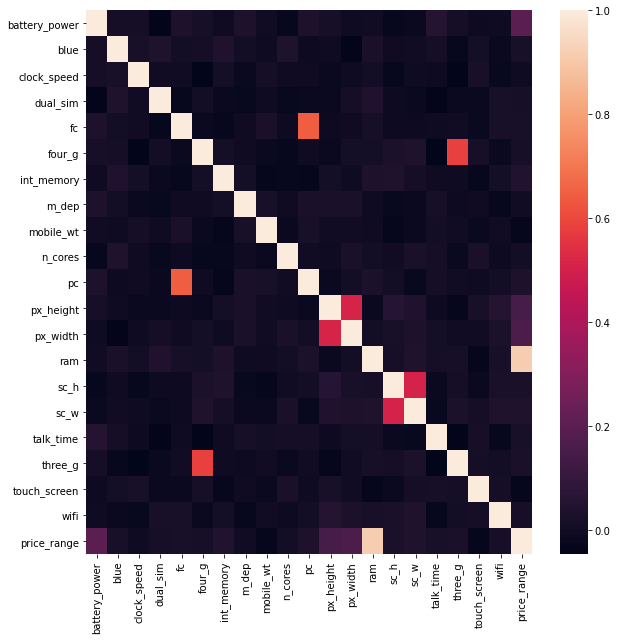

In [36]:

plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [41]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [50]:
## remove highly correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [51]:
correlation(df.iloc[:,:-1],0.5)


{'pc', 'px_width', 'sc_w', 'three_g'}

## Information Gain¶

They both measure the mutual information between a matrix containing a set of feature vectors and the target. They are under sklearn.feature_selection, since the mutual information can be used to gain some understanding on how good of a predictor a feature may be. This is a core concept in information theory, which is closely linked to that of entropy, which I would suggest you to start with. But in short, the mutual information between two variables, measures how much a given feature can explain another (target), or more technically, how much information about the target will variable will be obtained by having observed a feature.

In [52]:
from sklearn.feature_selection import mutual_info_classif


In [53]:
mutual_info=mutual_info_classif(x,y)


C:\Users\52054867\AppData\Local\Continuum\anaconda2\envs\mjain_env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [55]:
mutual_data=pd.Series(mutual_info,index=x.columns)
mutual_data.sort_values(ascending=False)

ram              0.848806
battery_power    0.029730
px_width         0.028830
px_height        0.028493
sc_w             0.018327
four_g           0.016888
dual_sim         0.015051
m_dep            0.015014
three_g          0.011452
touch_screen     0.007251
sc_h             0.005578
mobile_wt        0.005051
clock_speed      0.004520
fc               0.000000
blue             0.000000
wifi             0.000000
int_memory       0.000000
pc               0.000000
talk_time        0.000000
n_cores          0.000000
dtype: float64